# EDA for NLP on Song Lyrics 

In [1]:
from extract_lyrics import create_artist_lyrics_dict, dict_preprocess, lyrics_preproc, get_all_lyric_texts, lyrics_all_preprocess
from model import vectorized_tfidf_df, vectorized_cv_df, train_mnb
from sklearn.model_selection import train_test_split
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Dictonary for all artists with lyrics
artists = ['beatles', 'queen', 'beyonce']
#lyrics_dict = create_artist_lyrics_dict(artists)
labels_artists = []
corpus_artists = []

for artist in artists:
    label_list, corpus_list = get_all_lyric_texts(artist)
    labels_artists.append(label_list)
    corpus_artists.append(corpus_list)

labels = sum(labels_artists, [])
corpus = sum(corpus_artists, [])

  0%|          | 1/494 [00:00<01:03,  7.81it/s]
Reading html files by beatles
  0%|          | 1/368 [00:00<00:44,  8.24it/s]423 song lyrics retrieved

Reading html files by queen
  1%|          | 2/181 [00:00<00:15, 11.41it/s]336 song lyrics retrieved

Reading html files by beyonce
100%|██████████| 181/181 [00:17<00:00, 10.08it/s]127 song lyrics retrieved



In [3]:
elanor_rigby = corpus[0]
elanor_rigby

" We were talking about the space between us all and people who hide themselves behind a wall of illusion never glimpse the truth then it's far too late when they pass away We were talking about the love we all could share When we find it to try our best to hold it there with our love, with our love we could save the world if they only knew Try to realize it's all within yourself no one else can make you change And to see you're really only very small and life flows on within you and without you We were talking about the love that's gone so cold and the people who gain the world and lose their soul They don't know, they can't see Are you one of them When you've seen beyond yourself then you may find peace of mind is waiting there And the time will come when you see we're all one and life flows on within you and without you"

In [4]:
corpus_pre = lyrics_all_preprocess(corpus)

  0%|          | 1/886 [00:00<01:46,  8.32it/s]
Preprocess text corpus for TF-IDF
100%|██████████| 886/886 [00:43<00:00, 20.16it/s]


In [5]:
corpus_pre[0]

'  talk space people hide wall illusion glimpse truth far late pass away talk love share find try good hold love , love save world know try realize change small life flow talk love go cold people gain world lose soul know , see find peace mind wait time come life flow'

In [10]:
import spacy

nlp = spacy.load('en_core_web_md')
tokens = nlp(corpus[0])

for token in tokens:
    print(token, token.lemma_, token.pos_, token.dep_, token.is_stop)

    SPACE  False
We -PRON- PRON nsubj True
were be AUX aux True
talking talk VERB ROOT False
about about ADP prep True
the the DET det True
space space NOUN pobj False
between between ADP prep True
us -PRON- PRON pobj True
all all DET appos True
and and CCONJ cc True
people people NOUN conj False
who who PRON nsubj True
hide hide VERB relcl False
themselves -PRON- PRON dobj True
behind behind ADP prep True
a a DET det True
wall wall NOUN pobj False
of of ADP prep True
illusion illusion NOUN pobj False
never never ADV neg True
glimpse glimpse VERB conj False
the the DET det True
truth truth NOUN dobj False
then then ADV advmod True
it -PRON- PRON nsubj True
's be AUX ROOT True
far far ADV advmod False
too too ADV advmod True
late late ADJ acomp False
when when ADV advmod True
they -PRON- PRON nsubj True
pass pass VERB advcl False
away away ADV advmod False
We -PRON- PRON nsubj True
were be AUX aux True
talking talk VERB ROOT False
about about ADP prep True
the the DET det True
love love

In [4]:
# Get Tfidf_Matrix
#labels_pre, corpus_pre = dict_preprocess(lyrics_dict)

In [6]:
# Train-Test-Split
#X_train, X_test, y_train, y_test = train_test_split(corpus_pre, labels, test_size = 0.2, random_state=20)

In [7]:
#[(labels.count(x), x) for x in artists]

In [8]:
newspaper_article = """In politics, as in the rest of life, rules are often about power. Who sets them, who obeys them and who breaks them – and whether they get away with it – tells us a lot about where power lies. In Britain, with our unwritten and patched-together constitution, the rules of politics can be vague and poorly understood by voters, the media, and even some politicians. What is permitted – and what is not – forms a kind of constant, shifting fog, inside which crucial battles are fought.

“Politics is sometimes … about finding out how to change the rules of the game,” wrote the Anglo-American political philosopher Raymond Geuss in 2008. The Conservatives are often good at this exercise. Despite rarely being very popular, competent or full of ideas, they’ve managed to stay in office for the last 10 years through a variety of unconventional manoeuvres: forming a coalition with the Liberal Democrats; changing the electoral cycle with the Fixed-term Parliaments Act; avoiding a hostile House of Commons by illegally proroguing parliament; and, most important of all, by calling a rare and risky referendum on EU membership, losing it, and then siding with the winners.

All this manoeuvring has been made easier by the fact that the Conservatives are seen as Britain’s natural rulers, even by many of their enemies. The Tory reputation for pragmatism – you could call it shamelessness – also helps them. To much of rightwing Britain, an acceptable version of Conservatism is whatever Conservative governments say it is.

Sometimes, their rule-bending works almost to perfection. The Fixed-term Parliaments Act of 2011, which stated that governments should always last five years, except in narrowly defined circumstances, protected the Tories during the early 2010s, when their austerity and economic policies were so unpopular that they trailed far behind Labour in the polls, and the chancellor George Osborne was booed at the London Paralympics.

By the time a general election finally came, in 2015, the Tories had regained enough popularity to win. Then when electoral circumstances were favourable again, in 2017 and 2019, they found ways to get round their own legislation, with help from over-confident opposition parties, and called early elections. In 2017, the inept Conservative campaign squandered their advantage, but in 2019 they did not make the same mistake.

Last week, the government announced that the Fixed-term Parliaments Act would be repealed. As if they had only just realised, ministers said it had been “a departure from the long-term constitutional norm”, and had been “making it harder to have necessary elections”. That the act had been largely a Conservative idea in the first place they somehow forgot to mention. The government also announced its intention to prevent the courts from challenging future prorogations of parliament.

The usual response from non-Tories to such brazen gaming of our political system is to feel appalled, frustrated or helpless – or to argue that Britain needs a more watertight constitution, which would supposedly make such manipulation impossible. But creating a constitution that constrains Britain’s most powerful party is an ambitious goal. In the shorter term, liberals and leftists might be better off taking on board the Conservatives’ insight that the current political system is malleable, and make some alterations to it of their own.

Very occasionally, non-Tory governments have done that. In 1911, after a Tory-dominated House of Lords had blocked the Liberal chancellor David Lloyd George’s radically redistributive 1909 “people’s budget”, his government pushed through the Parliament Act, which removed the Lords’ power to veto legislation.

Decades later, Tony Blair’s government was the first Labour one to enact many significant constitutional reforms: removing most hereditary peers from the Lords, introducing proportional representation for European elections, and devolving power to Scotland, Wales, Northern Ireland and a handful of elected mayors. All of these were welcome erosions of the old, centralised, often Tory-friendly way of doing things. But the beneficiaries have often been parties other than Labour. The SNP used devolution – and the 2014 independence referendum granted by the Conservatives – to become Scotland’s dominant party, at Labour’s expense. And the most powerful politician Blair’s devolution has produced is the former mayor of London, Boris Johnson.

In the US, another country with a political system that the right has gamed for decades, there’s more awareness among leftists and centrists that this has taken place, and more readiness to consider aggressive responses, such as expanding the Senate and supreme court to reduce their conservative biases. The existing political rules have lost much of their legitimacy: even the Economist magazine, usually cautiously centrist in its US coverage, argued in 2018 that American democracy had become a “tyranny of the minority”, with “a built-in bias towards rural Republicans”. It’s harder to imagine an establishment publication here being prepared to say that our political system is tilted too far rightwards. Believing that we do democracy fairly – which for many Britons means allowing the left an occasional win – is still an ingrained national habit.

Yet critics of our system shouldn’t despair. With Brexit, there are signs that the Tory disdain for rules has reached its limits as a political strategy – that it has, in fact, become counterproductive.

The Brexit campaign always had a lot in common with the modern Conservative party’s quest for hegemony: a readiness to win by any means necessary; shared personnel, such as the professional rule-breakers Boris Johnson and Dominic Cummings; and above all, a belief that if you can shake off regulations imposed by others, the possibilities are limitless. As the BBC’s Europe editor, Katya Adler, put it this week: “For the UK [government], the whole point of national sovereignty is that you can make rules, break rules.”

The EU’s negotiators have known all along that this is the Brexit mindset. Their preoccupation with “level playing fields” and “non-regression” clauses has shown that they don’t trust Britain to keep to any rules once we leave the EU, unless they are very carefully drawn. For four excruciating years, our shifty government has tried to convince the EU that a Brexit Britain won’t need to be reined in. But they haven’t succeeded. Rules are often about power. And in Europe, unlike in Britain, the Conservatives are not in charge.

Next month, whether we leave the EU with a trade deal or not, the UK will become in some ways a more rule-bound place: where lorry drivers need a Kent access permit if they plan to cross the Channel, and businesses need to fill in forms to move goods from Britain to Northern Ireland. The consequences of the Conservative contempt for the political rules will begin to be felt in new ways by the rest of us. Even voters who don’t care about the political rules will notice."""

In [ ]:
## Wordcloud with word string

In [17]:
#https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

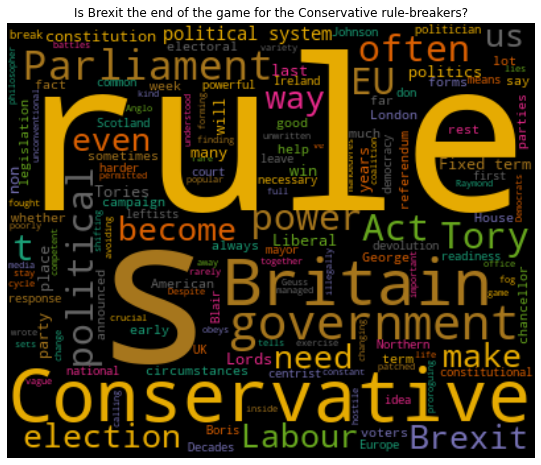

In [9]:
wc = WordCloud(width=400, height=330, max_words=150, colormap='Dark2')          # canvas width, height, maximal words displayed, matplotlib colour map
wc.generate(newspaper_article)                                                  # Count Vectorizer integrated - fits data
plt.figure(figsize=(10,8))                                                      # Plot size
plt.imshow(wc, interpolation='bilinear')                                        # Displays image data from wc
plt.axis('off')                                                                 # Removes x- and y-axis
plt.title('Is Brexit the end of the game for the Conservative rule-breakers?')  # Title
plt.show()                                                                      # Shows plots

In [12]:
def generate_wordcloud(data, title):
    wc = WordCloud(width=400, height=330, max_words=150, colormap='Dark2')
    wc.generate_from_frequencies(data) 
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [13]:
def show_most_common_words(df):
    artists_common_words = df.groupby(df.index).sum()
    artists_common_words_tp = artists_common_words.transpose()

    for index, artist in enumerate(artists_common_words_tp):
        generate_wordcloud(artists_common_words_tp[artist].sort_values(ascending=False), artist)

In [66]:
# EDA
df_tfidf = vectorized_tfidf_df(corpus, labels, min_df=0.01, max_df=0.3, ngram_range=(1, 3))
df_tfidf_pre = vectorized_tfidf_df(corpus_pre, labels, min_df=0.01, max_df=0.3, ngram_range=(1, 3))
#df_cv = vectorized_cv_df(corpus, labels)



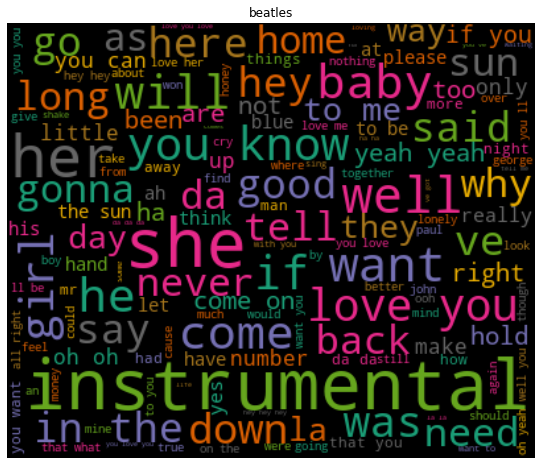

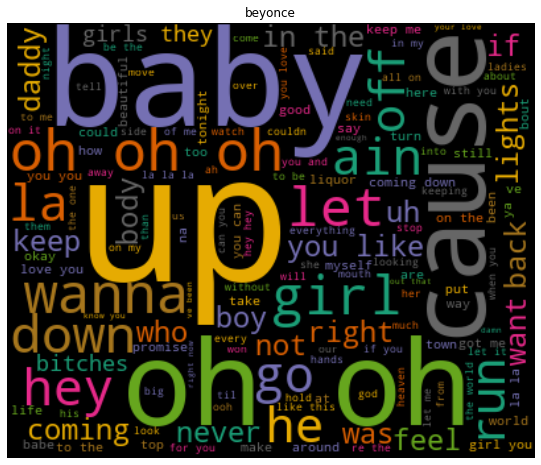

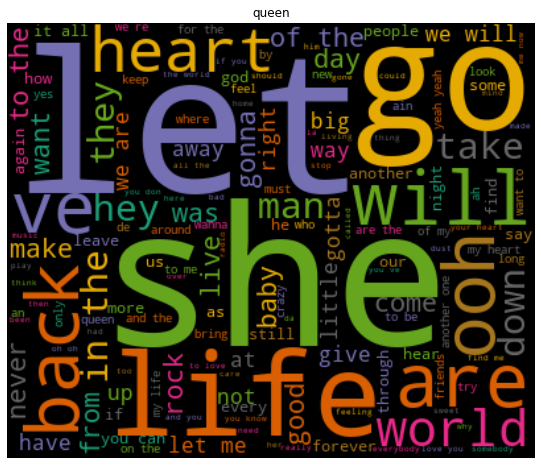

In [71]:
show_most_common_words(df_tfidf)

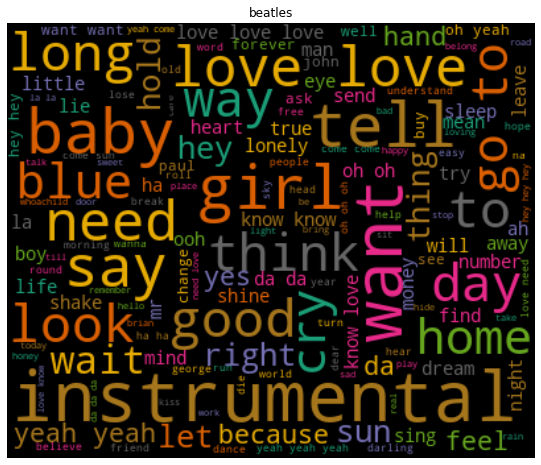

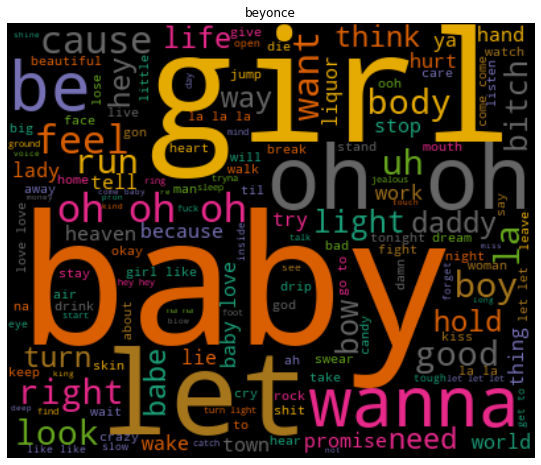

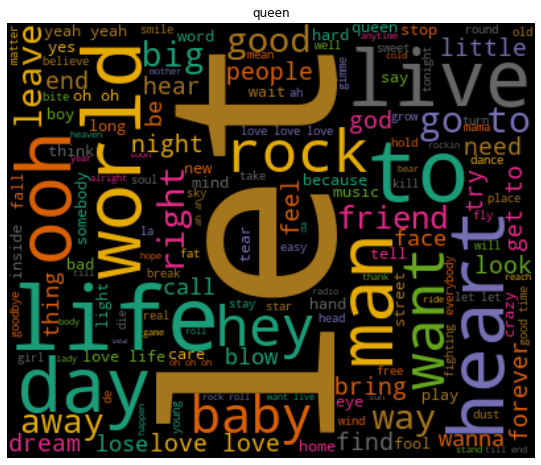

In [70]:
show_most_common_words(df_tfidf_pre)

In [69]:
df_tfidf_pre

,aah,about,absolutely,ache,ache time,act,action,address,afraid,age,...,yeah yeah yeah,year,yeh,yellow,yes,yes know,yes yes,yesterday,yo,young
beatles,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beatles,0.0,0.0,0.0,0.0,0.0,0.065238,0.0,0.0,0.0,0.0,...,0.0,0.516536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beatles,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beatles,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beatles,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
beyonce,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beyonce,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.042118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beyonce,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beyonce,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
